<a href="https://colab.research.google.com/github/manoharpavuluri/dl-cnn-imageClassification-CIFAR/blob/main/dl_cnn_imageClassification_CIFAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 5s 0us/step


(50000, 32, 32, 3)

training samples are 50000, each of 32x32 size and 3 is for RGB channels

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
X_train[0].shape

(32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

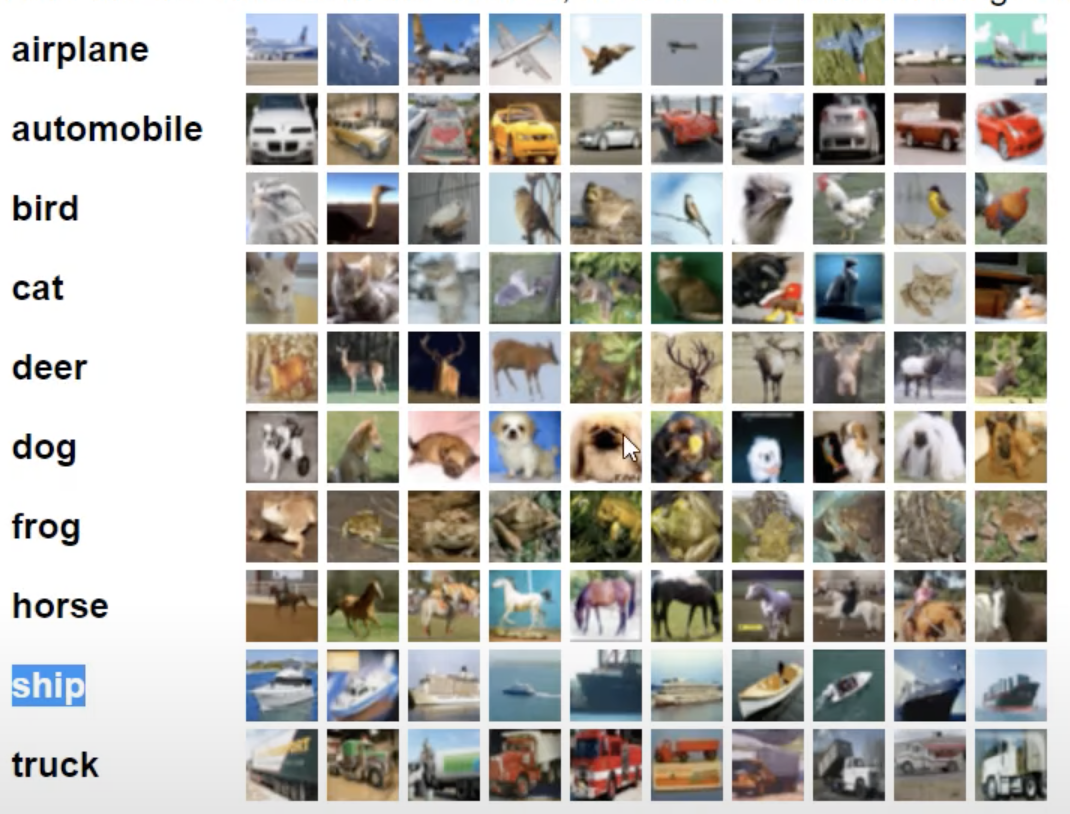

In [6]:
classes = ["airplace", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train.shape

(50000, 1)

its a 2 dimensional array but cnn takes single dimensional array. lets transform.
so below lets use numpy's reshape. first is 50000, which you want to keep it as it is. so when you specify -1, no transformation happens. and when you specify blank, it transforms from 2 to 1 dimension.

In [9]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
def plot_sample(X, y, index):
  plt.figure(figsize=(15,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

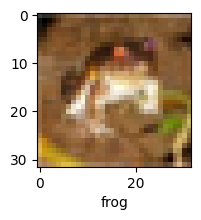

In [11]:
plot_sample(X_train, y_train, 0)

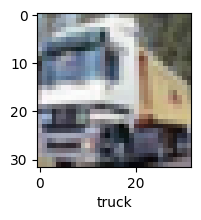

In [12]:
plot_sample(X_train, y_train, 1)

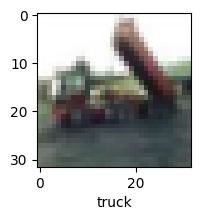

In [13]:
plot_sample(X_train, y_train, 2)

In [14]:
X_train[:1]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [15]:
# lets normalize the data, by deviding the 255 which is highest value in rgb value

X_train = X_train/255
X_test = X_test/255

In [16]:
X_train[:1]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

lets do artificial neural network before we move to cnn

In [17]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 10s 5ms/step - loss: 1.8096 - accuracy: 0.3540
Epoch 2/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6217 - accuracy: 0.4253
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5396 - accuracy: 0.4551
Epoch 4/5
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4807 - accuracy: 0.4758
Epoch 5/5
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4304 - accuracy: 0.4977


reason for using sparse_categorical_crossentropy - when we use a index rather 0 and 1

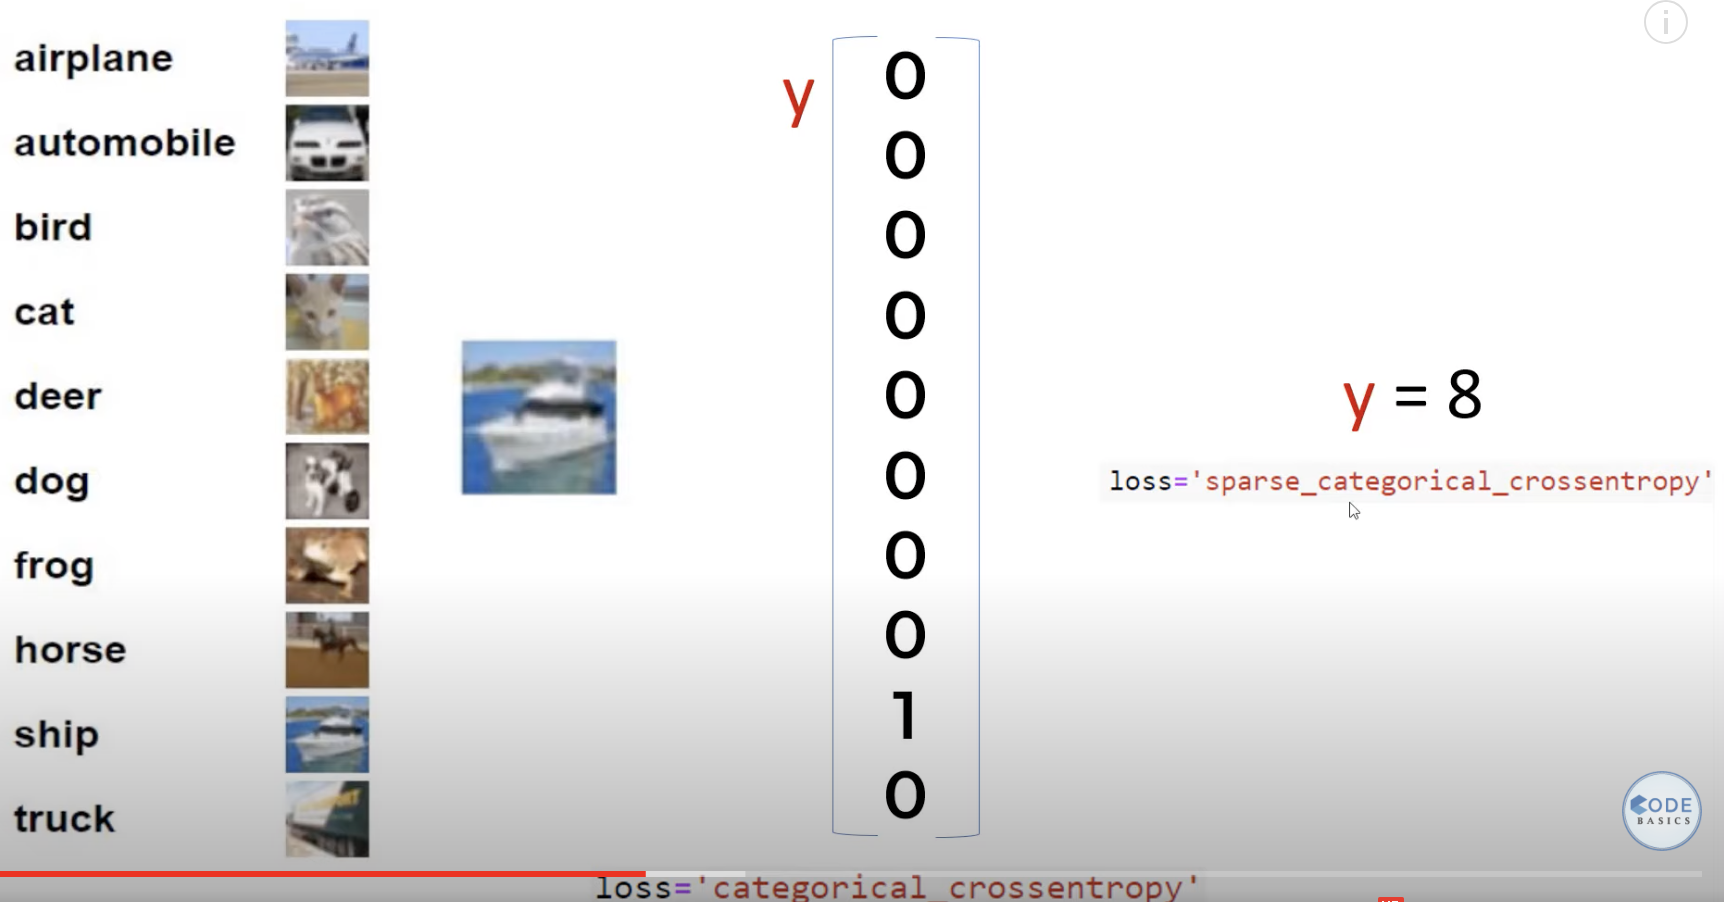

In [18]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5173 - accuracy: 0.4650


[1.5172715187072754, 0.4650000035762787]

as you can see ann is performing bad with 48% accuracy with 5 epochs

In [35]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred_ann = ann.predict(X_test)
y_pred_classs_ann = [np.argmax(element) for element in y_pred]

print("\n ANN Classification Report: \n", classification_report(y_test,y_pred_classs_ann))



313/313 [==============================] - 1s 2ms/step

 ANN Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73      1000
           1       0.88      0.83      0.85      1000
           2       0.61      0.64      0.62      1000
           3       0.52      0.60      0.56      1000
           4       0.65      0.69      0.67      1000
           5       0.73      0.54      0.62      1000
           6       0.75      0.81      0.78      1000
           7       0.73      0.77      0.75      1000
           8       0.79      0.84      0.81      1000
           9       0.86      0.72      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



Classification report is  giving Precision, recall, f1-score for each of the 9 classes (airplane to truck)

CNN 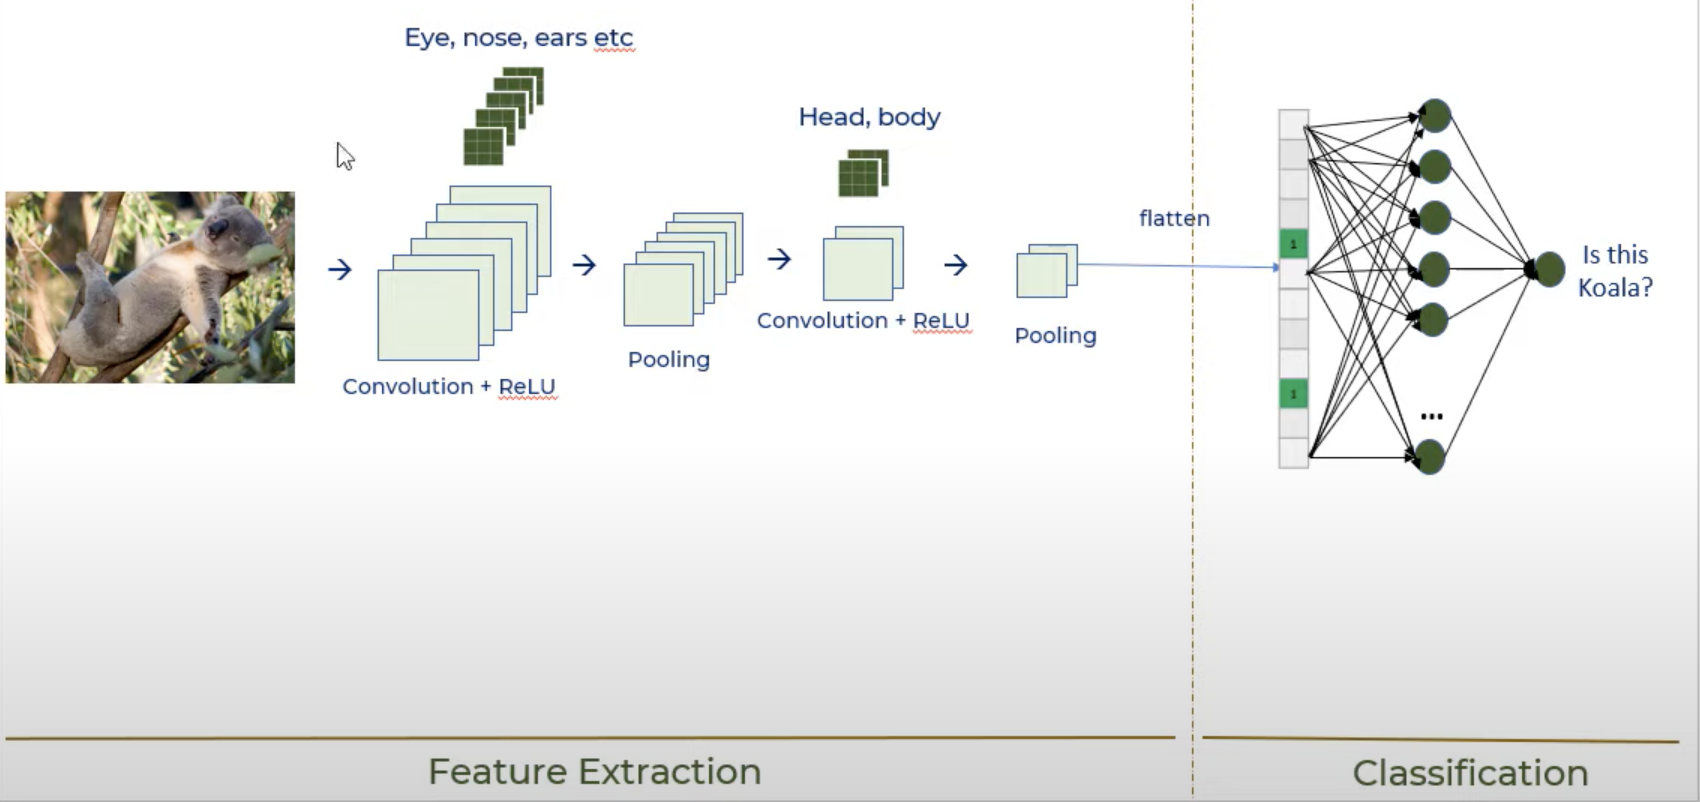

Classification where you add ann( or dence network)

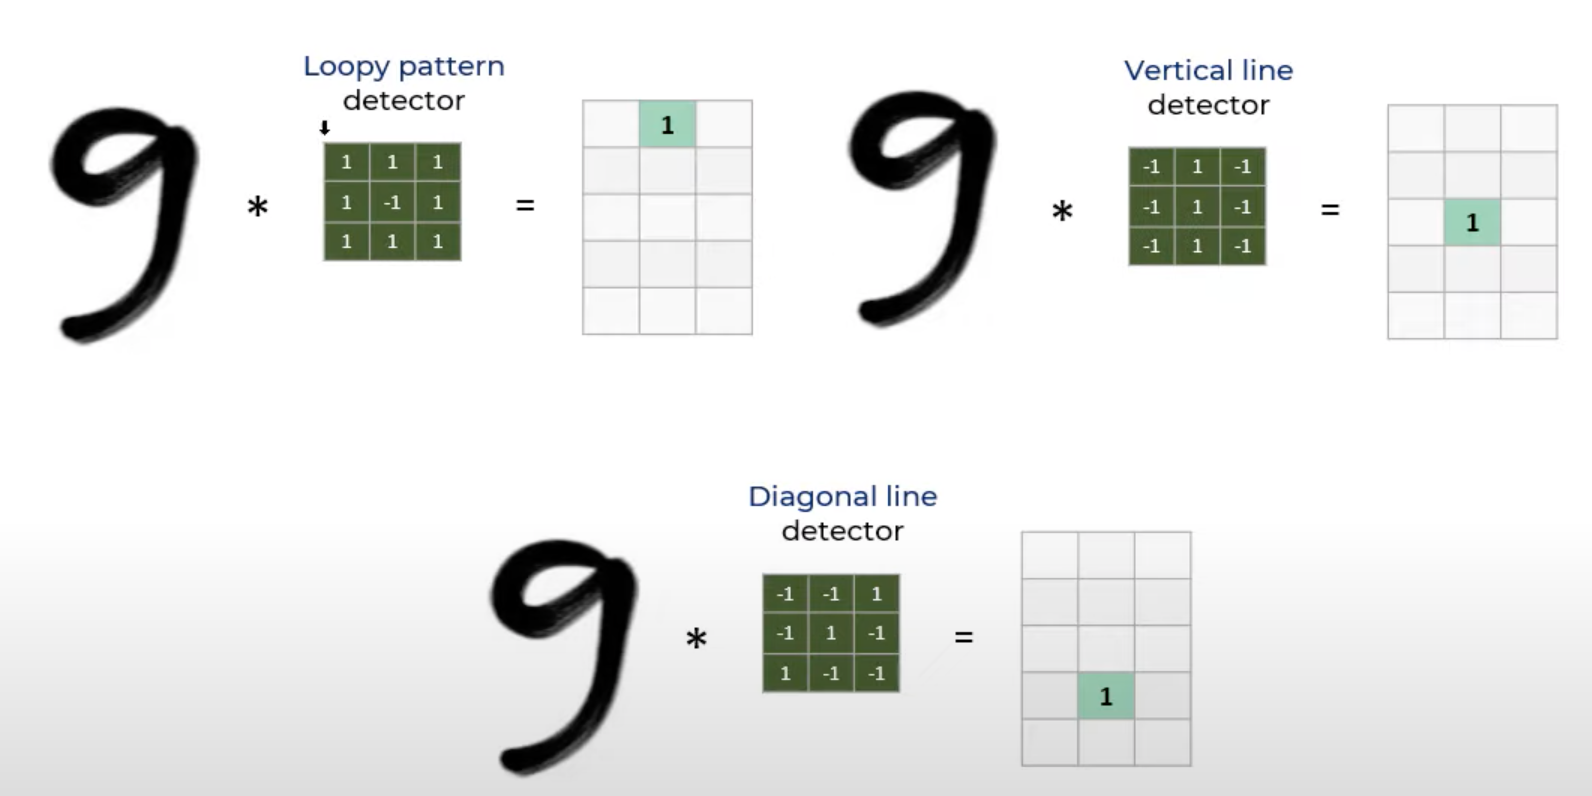

* CNN, as in the image, is a mix of cnn network and dense network.
* and since CNN takes care of most of heavy liftning, you dont need that many layers and neurons in dense network
* when you are in the middle layer you dont need to define the shape, the network can figure it out
* we will use softmax activation function. softmax normalize the propability compared to sigmoid for the classes. ie sum of all propability will be equal to 1. like example if you have 2 classes  with propability of 0.46 and 0.79, then softmax will normalize as 0.46/(0.46+0.79) for class1 and 0.79/(0.46+0.79). vs Sigmoid will keep it as .46 and 0.79.
* while building the CNN layers, we will use the Convulution layer to determine the features as shown in above 2 images. in the Convolution layer, we define, how many filters we need, like example in the image obeve for 9 we have 3 filters, of size(/kernel_size) 3x3. 1st filter use to detect the head, 2nd for the body, 3rd for the feet.





In [20]:
cnn = models.Sequential([

    layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=128, kernel_size=(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),

     #dense /ann
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 10s 4ms/step - loss: 1.5261 - accuracy: 0.4443
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1648 - accuracy: 0.5874
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0072 - accuracy: 0.6469
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8957 - accuracy: 0.6867
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8181 - accuracy: 0.7145
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7492 - accuracy: 0.7378
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7001 - accuracy: 0.7564
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6497 - accuracy: 0.7709
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6035 - accuracy: 0.7897
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.56

* above, we tried 3 cnn models,  1, with only 1 convolution and pooling layer, accuracy was under 40, whenused with 2 convolution  and pooling layers, accuraccy was 79. when used with 3 layers, with same amount of filters as 2nd layer, the accuracy went down to 78. But when doubled the filters, it went up by 1% to 80%. so is it worth?

In [21]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.8688 - accuracy: 0.7186


[0.8688265681266785, 0.7185999751091003]

In [37]:
y_pred_cnn = cnn.predict(X_test)
y_pred_classs_cnn = [np.argmax(element) for element in y_pred_cnn]

print("\n CNN Classification Report: \n", classification_report(y_test,y_pred_classs))

313/313 [==============================] - 1s 2ms/step

 CNN Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.73      0.73      1000
           1       0.88      0.83      0.85      1000
           2       0.61      0.64      0.62      1000
           3       0.52      0.60      0.56      1000
           4       0.65      0.69      0.67      1000
           5       0.73      0.54      0.62      1000
           6       0.75      0.81      0.78      1000
           7       0.73      0.77      0.75      1000
           8       0.79      0.84      0.81      1000
           9       0.86      0.72      0.79      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



you can see CNN is better than ANN

TypeError: only integer scalar arrays can be converted to a scalar index

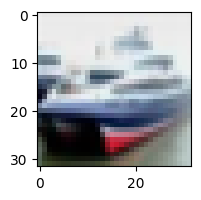

In [26]:
# lets plot some samples

plot_sample(X_test,y_test,1)

In [28]:
# the reason you are getting above error is because the y_test is 2 dimensional array, as always we need to convert it into 1 dimension
# lets see y_test dimension

y_test[:5]


array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [32]:
# lets reshape it
y_test_reshaped = y_test.reshape(-1,)
y_test_reshaped[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

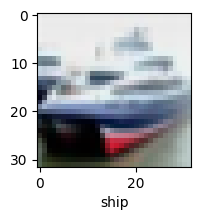

In [30]:
# now lets replot it

plot_sample(X_test,y_test_reshaped,1)

In [38]:
# we know that y_test for 1st image is ship. lets predict first 5

y_pred_cnn = cnn.predict(X_test)
y_pred_cnn[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.02268243e-02, 2.09098289e-05, 3.65824392e-03, 9.35659766e-01,
        6.75578078e-04, 2.12642532e-02, 2.23785173e-02, 6.98657386e-05,
        5.92735643e-03, 1.18632051e-04],
       [1.69883668e-02, 1.38182025e-02, 6.63364347e-07, 1.66876066e-06,
        7.98268957e-06, 7.77366438e-09, 1.49536811e-06, 7.31343619e-07,
        9.69044030e-01, 1.36868111e-04],
       [7.37176538e-02, 3.42618711e-02, 2.19224909e-04, 2.19361600e-03,
        1.98816982e-04, 2.91681004e-04, 1.07448548e-03, 2.51244497e-03,
        8.38383079e-01, 4.71471325e-02],
       [2.90395766e-01, 2.83500645e-02, 7.79264432e-04, 3.24451918e-04,
        6.32729323e-04, 2.64185610e-06, 3.97592405e-04, 3.90810601e-06,
        6.77540243e-01, 1.57329382e-03],
       [1.13892165e-05, 1.33467381e-06, 8.16271082e-02, 5.93714751e-02,
        5.65550089e-01, 7.54907494e-04, 2.92625278e-01, 1.14266750e-05,
        4.67719474e-05, 2.02984950e-07]], dtype=float32)

* what above thing is showing is probability of prediction for each class. So whichever class has the hihest prob, than thats class for prediction. so if we want to us get the max value, then we **argmax**
* the other thing to note is since we are using Softmax activation, the prob is between 0 and 1.  

In [34]:
# example of argmax. it gives the index of the max value

np.argmax([1,3, 12, 5, 8])

2

In [41]:
# now lets build list comprehension by using  [np.argmax(element) for element in y_pred_cnn] and then predict
#        first 5 and compare it with first 5 in y_test

y_pred_classs_cnn =  [np.argmax(element) for element in y_pred_cnn]
y_pred_classs_cnn[:5]


[3, 8, 8, 8, 4]

In [42]:
y_test_reshaped[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

as you can see not all are matching but mostly matching as the accuracy is not 100%, and it is accuracy: 71.86%

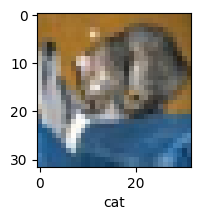

In [44]:
plot_sample(X_test,y_test_reshaped,0)

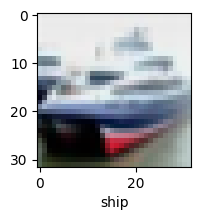

In [45]:
plot_sample(X_test,y_test_reshaped,1)

In [46]:
classes[y_pred_classs_cnn[0]]

'cat'